## Multiple Linear Regression
#### Bike Sharing Assignment

#### Introduction:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

## Step1: Reading and Understanding the data

Import libraries to read the data set

In [778]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [779]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [780]:
bike_data = pd.read_csv('day.csv')

In [781]:
# Check head of the data set
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [782]:
#Check shape of data set
bike_data.shape

(730, 16)

In [783]:
#Checking if there are any null values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null or missing values in the data set

In [784]:
# Check describe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Removing unecessary variables from data set

- *instant* : instant is index hence is not impactful in data set
- *dteday* : There are variables yr and mnth from which this data can be derived
- *casual & registered* : as cnt have both casual and registred and there is no impact of these individual variables in interpreting the results

In [785]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [786]:
bike_modify = bike_data [['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 
                          'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
bike_modify.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation
- Dataset have colums season, month, weekday and weathersit. These have to converted into categorical variables
- According to dictionary
    - season : season (1:'spring', 2:'summer', 3:'fall', 4:'winter')
    - weekday : day of the week (0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat')
    - mnth : month ( 1 to 12)
    - weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +   Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [787]:
# Convert these to category data type

bike_modify['season']=bike_modify['season'].astype('category')
bike_modify['weekday']=bike_modify['weekday'].astype('category')
bike_modify['mnth']=bike_modify['mnth'].astype('category')
bike_modify['weathersit']=bike_modify['weathersit'].astype('category')

bike_modify.info()
bike_modify.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [788]:
# Create Dummy variable and drop original variable for which the dummy was created
bike_modify = pd.get_dummies(bike_modify, drop_first=True)
bike_modify.info()
bike_modify.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step2: Visualizing Data
Understanding the data through visualization
- Multicollinearity can be seen here
- if any predictors have a strong association with the outcome variable

Use matplotlib and seaborn for this!

In [789]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables
Pairplot of all the numeric variables

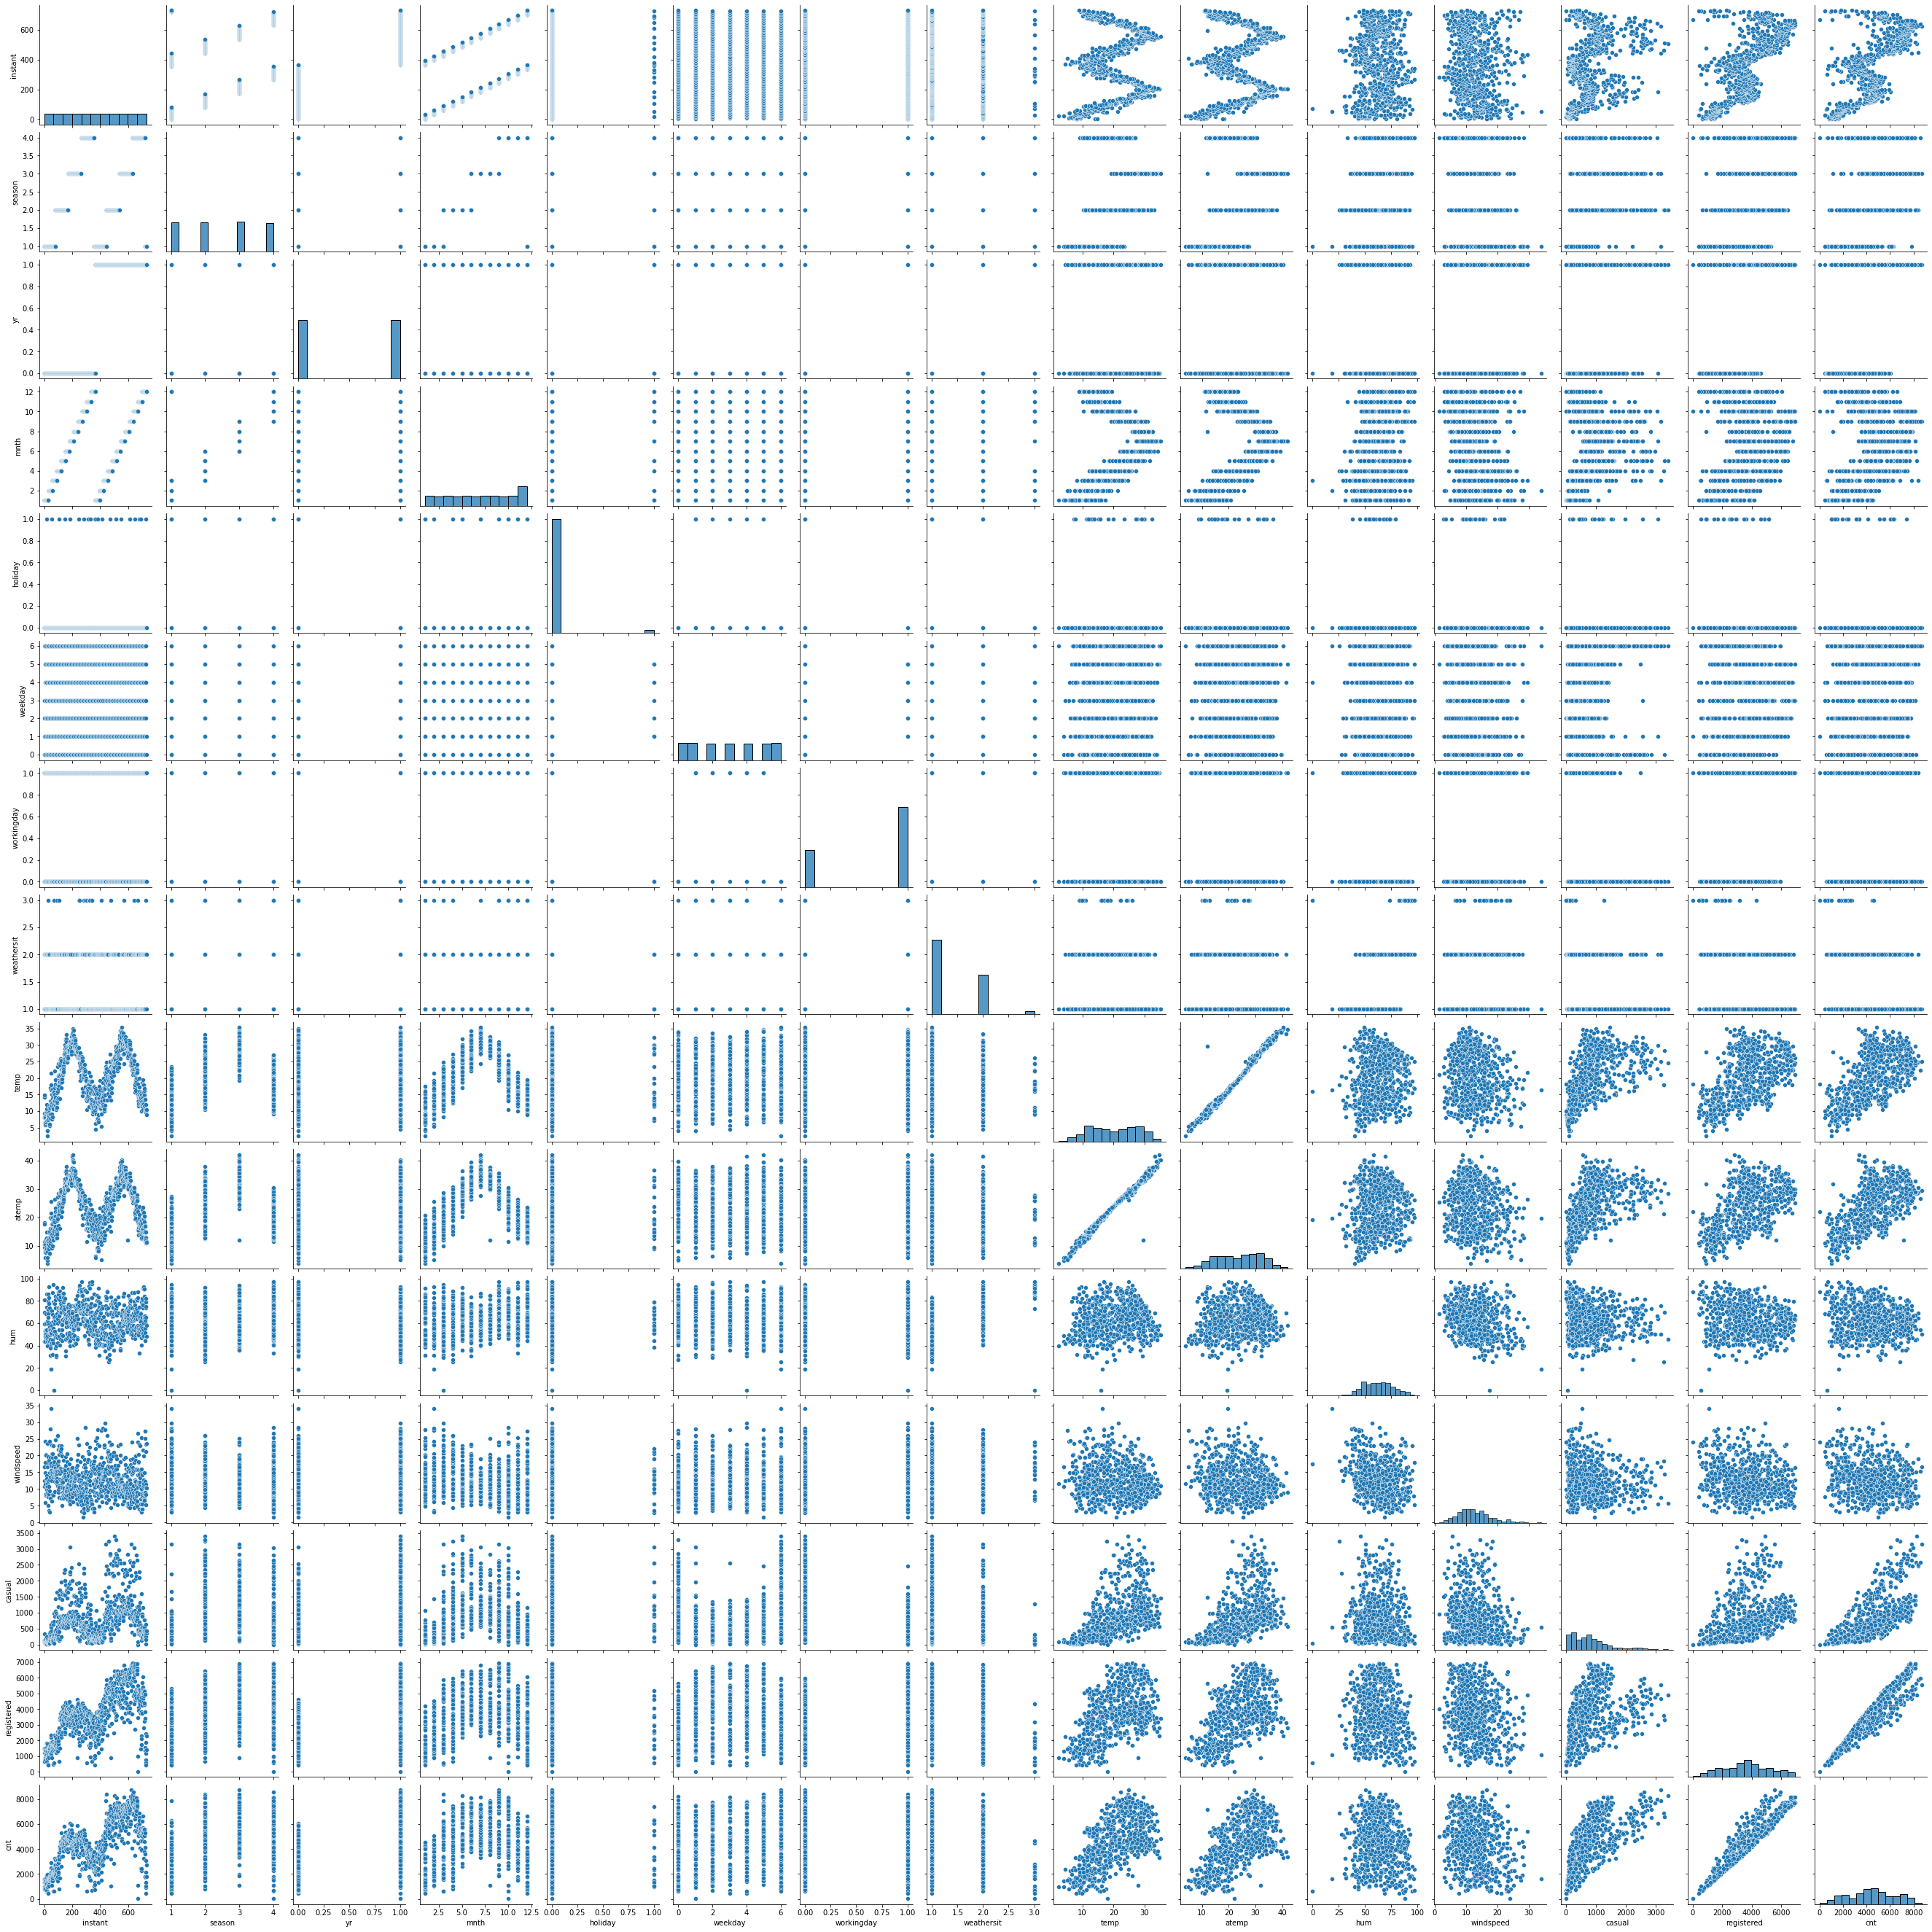

In [790]:
sns.pairplot(bike_data)
plt.show()

From above pair-plot it is clear that there is linear relationship between temp, atmp with cnt variables

#### Visualising Categorical Variables
There are a few categorical variables as well. Using boxplot for these variables.

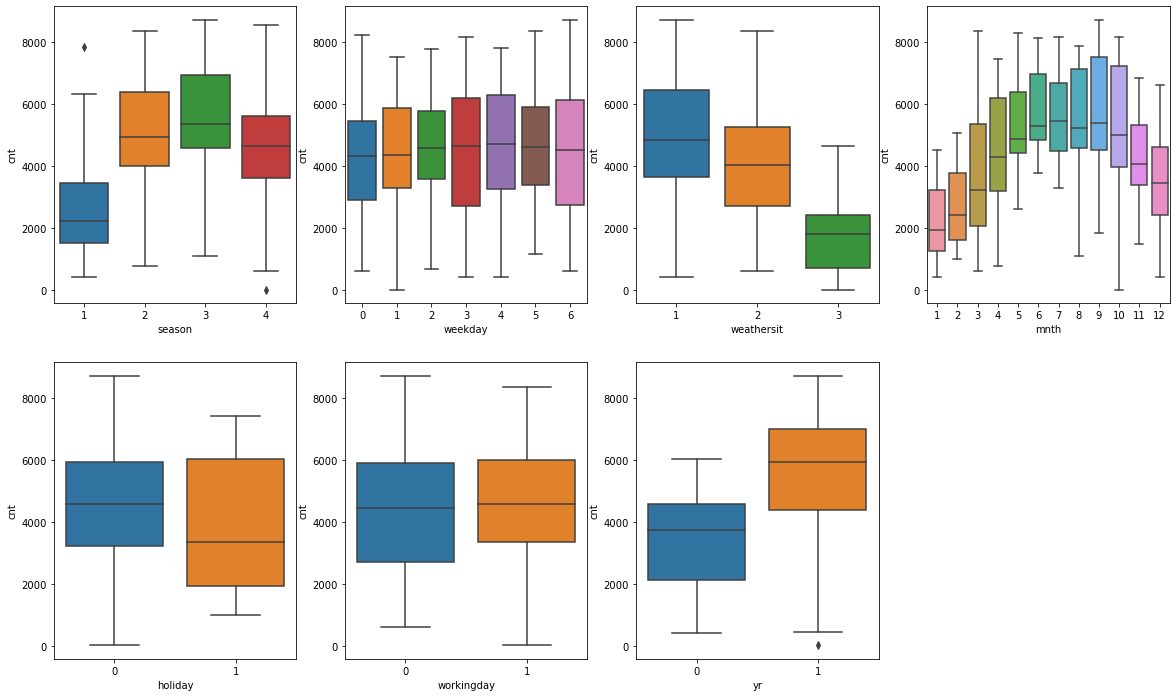

In [791]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

**_Observation_**

* Highest bike booking are happening in season3 (Fall). Next highest is season2 (Summer). Season can be used to predict

* Highest bike booking are happening in ‘weathersit1' which has median approx to 5000 booking. Next highest is weathersit2 with median 4000. 0 for weatherdsit4. Weathersit can be used to predict

* Bike booking for months 5,6,7,8,9 & 10 are high, with a median of over 4000 booking per month. There is a trend for bookings and good predictor.

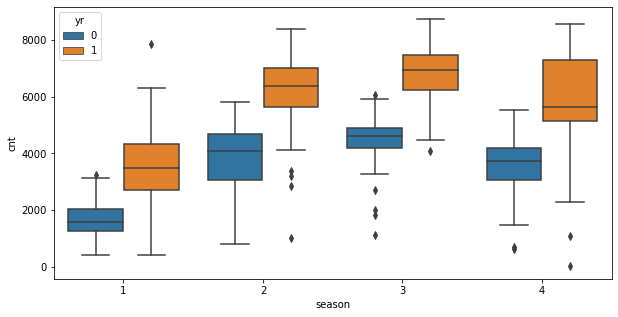

In [792]:
# bivariate analysis for categoryical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike_data)
plt.show()

* The number of bike shares incresed in 2019 with respect to all seasons

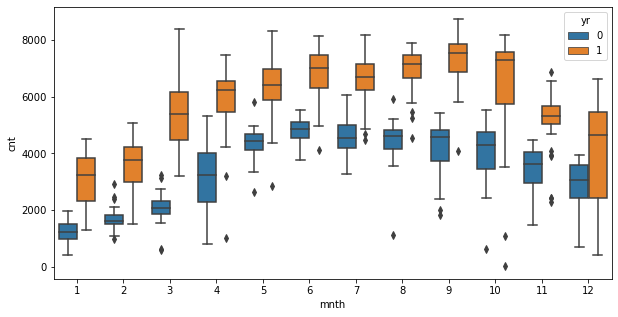

In [793]:
# bivariate analysis for categoryical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bike_data)
plt.show()

* The number of bike shares incresed in 2019 with respect to month. 

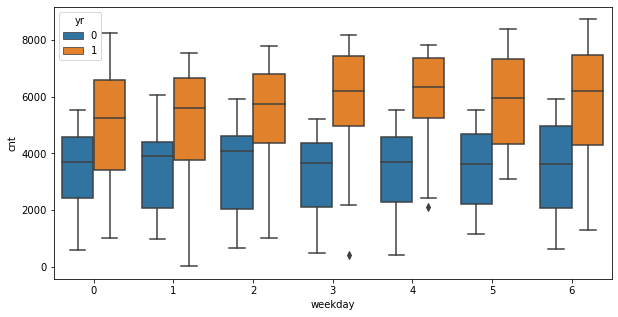

In [794]:
# bivariate analysis for categoryical variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bike_data)
plt.show()

* weekdays have similar kind of trend in each year

## Step 3: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [795]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_modify, train_size = 0.7, test_size = 0.3, random_state = 100)

In [796]:
bike_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [797]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [798]:
df_test.shape

(219, 30)

## Rescaling the Features
It is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales.
There are two common ways of rescaling:
- Min-Max scaling (noormalisation): Between 0 to 1
    - (x - xmin)/(xmax - xmin)
- Standardisation (mean-0, sigma-1)
    - (x - mu)/sigma
Using Min Max scaling

In [799]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [800]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


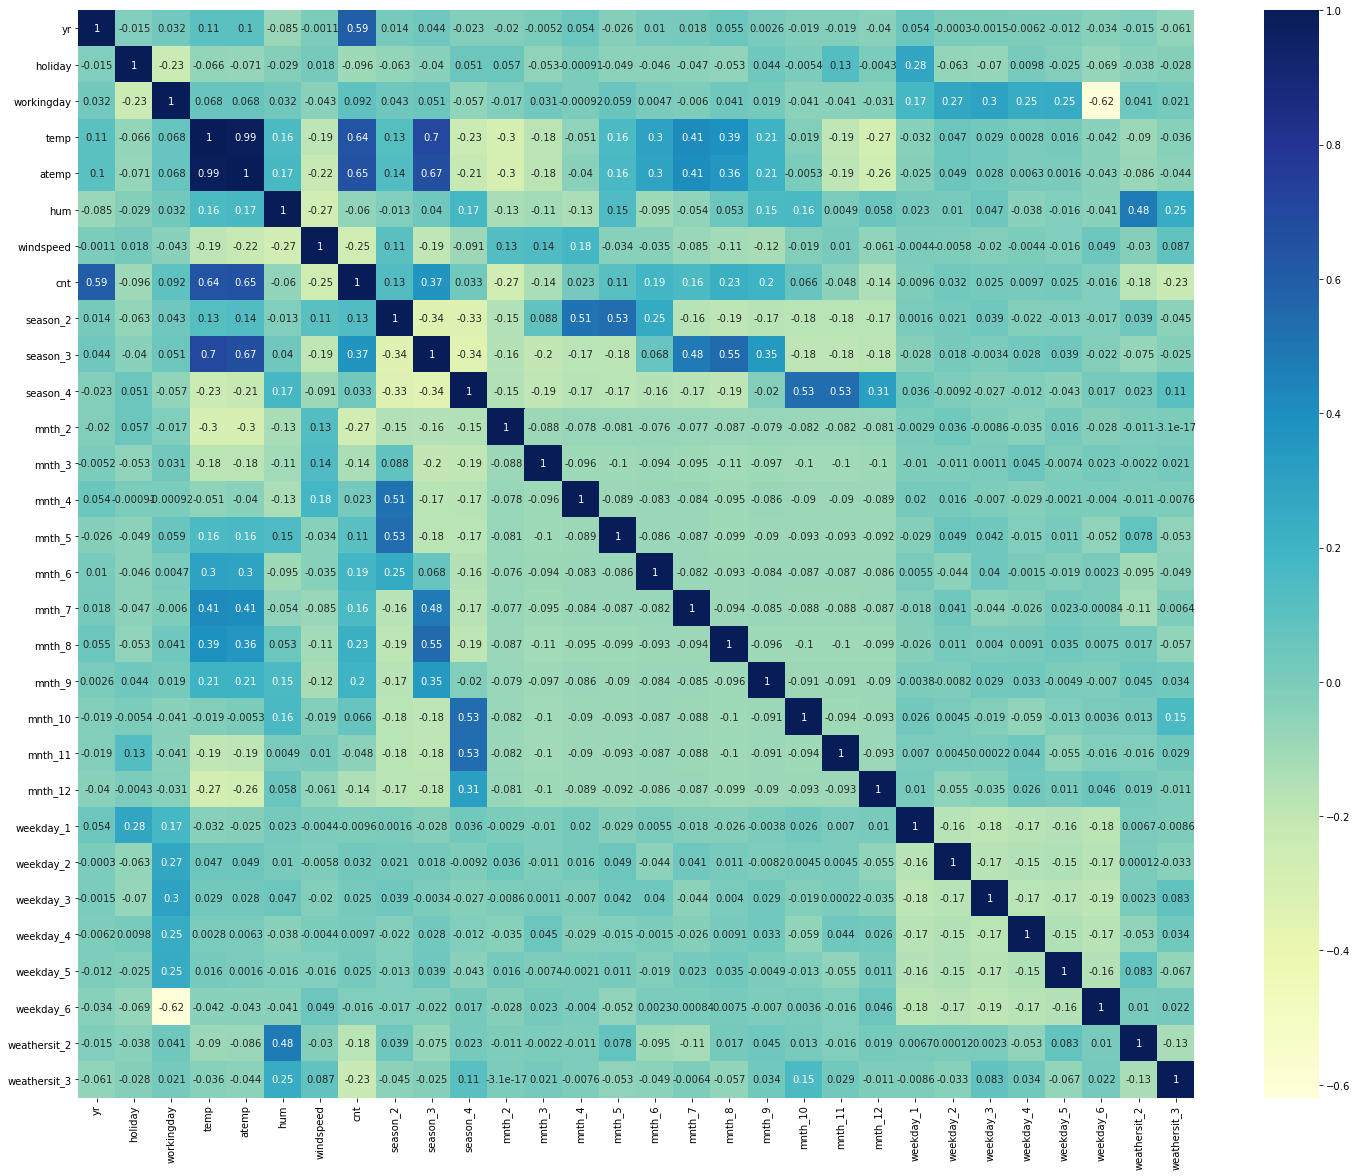

In [801]:
## Correlation Matrix

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* It is clear that there is high correlation between temp, atmp and cnt variables
* Multi-colinearity exsists
* This can be used to identify highly correlated variable and cross-check this while data modeling

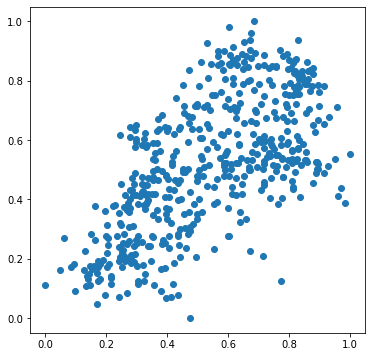

In [802]:
#As tmp and cnt are high correlated building scatter plot

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## Dividing into X and Y sets for the model building

In [803]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step4: Building a linear model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [804]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [805]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [806]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 15),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [807]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [808]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [809]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [810]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [811]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [812]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          5.30e-181
Time:                        21:48:25   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.559   

In [813]:
lm.params

const           0.257910
yr              0.227001
holiday        -0.067535
workingday      0.023560
temp            0.592570
hum            -0.279534
windspeed      -0.201605
season_2        0.088195
season_4        0.145931
mnth_9          0.103990
weekday_1      -0.017145
weekday_2      -0.015403
weekday_3      -0.003371
weekday_4      -0.006138
weekday_5      -0.001918
weathersit_3   -0.196851
dtype: float64

In [814]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
10,weekday_1,inf
11,weekday_2,inf
12,weekday_3,inf
13,weekday_4,inf
14,weekday_5,inf
0,const,42.45
5,hum,1.25
8,season_4,1.25


In [815]:
#As atemp has both p-value and VIF high, hence removing it
X_train_new = X_train_rfe.drop(["weekday_1"], axis = 1)

#X_train_new = X_train_new.drop(["holiday"], axis=1)
X_train_new = X_train_new.drop(["weekday_2"], axis=1)
X_train_new = X_train_new.drop(["weekday_3"], axis=1)
X_train_new = X_train_new.drop(["weekday_4"], axis=1)
X_train_new = X_train_new.drop(["weekday_5"], axis=1)
X_train_new.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0


In [816]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [817]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          2.32e-185
Time:                        21:48:25   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -961.2
Df Residuals:                     499   BIC:                            -914.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2592      0.027      9.645   

In [818]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.30
5,hum,1.25
8,season_4,1.24
4,temp,1.21
7,season_2,1.19
6,windspeed,1.16
9,mnth_9,1.11
10,weathersit_3,1.11
2,holiday,1.07
3,workingday,1.07


In [819]:
X_train_new1 = X_train_new.drop(["workingday"], axis=1)

In [820]:
X_train_lm2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          5.16e-186
Time:                        21:48:26   Log-Likelihood:                 490.26
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     500   BIC:                            -918.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2690      0.026     10.254   

In [821]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
4,hum,1.25
7,season_4,1.24
3,temp,1.20
6,season_2,1.19
5,windspeed,1.16
8,mnth_9,1.11
9,weathersit_3,1.11
1,yr,1.02
2,holiday,1.01


In [822]:
X_train_new2 = X_train_new1.drop(["const"], axis=1)

In [823]:
X_train_lm3 = sm.add_constant(X_train_new2)
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          5.16e-186
Time:                        21:48:26   Log-Likelihood:                 490.26
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     500   BIC:                            -918.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2690      0.026     10.254   

In [824]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.01
2,temp,7.10
4,windspeed,3.53
0,yr,2.01
6,season_4,1.64
5,season_2,1.58
7,mnth_9,1.20
8,weathersit_3,1.09
1,holiday,1.04


In [825]:
X_train_new3 = X_train_new2.drop(["hum"], axis=1)
X_train_lm4 = sm.add_constant(X_train_new3)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          1.42e-171
Time:                        21:48:27   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0872      0.017      5.001   

In [826]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [827]:
#Model coefficients
lm4.params

const           0.087179
yr              0.233667
holiday        -0.087091
temp            0.568657
windspeed      -0.145312
season_2        0.080175
season_4        0.127485
mnth_9          0.089117
weathersit_3   -0.254079
dtype: float64

#### Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
    - The coefficients have very low p-value hence model is significant
2. R-squared
    - The R2 value is 0.80 that means 80% of varience is model is explained by its coeffients. It is a decent R2 value
3. F statistic and its significance
    - F-statistic has very low p-value hence the model is significant and variance explained above is not by chance

## Step 5: Residual Analysis

In [828]:
y_train_pred = lm4.predict(X_train_lm4)

In [829]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

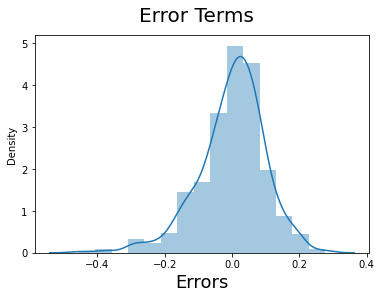

In [830]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Step 6: Making Predictions

In [831]:
#Applying the scaling on the test sets


num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [832]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X and Y for test set

In [833]:
y_test = df_test.pop('cnt')
X_test = df_test

In [834]:
# Creating X_test_new dataframe by dropping variables from X_test
col_test = X_train_new3.columns
X_test_new = X_test[col_test]

In [835]:
# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm4.predict(X_test_lm)

In [836]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7724376516730699

## Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

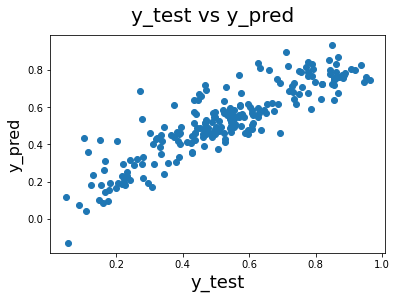

In [764]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [849]:
round(lm4.params,4)

const           0.0872
yr              0.2337
holiday        -0.0871
temp            0.5687
windspeed      -0.1453
season_2        0.0802
season_4        0.1275
mnth_9          0.0891
weathersit_3   -0.2541
dtype: float64

$ cnt = 0.0872 + 0.233×yr  -0.0871×holiday + 0.568×temp - 0.145×windspeed 
+0.080×season_2 + 0.127×season_4 + 0.089×mnth_9 - 0.254×weathersit_3 $

In [847]:
## Adjusted R-squared for test

r2 = 0.7724376516730699
# number or rows and pridictors for calculating adjusted r2
n = X_test_lm.shape[0]  #This is for rows
print(n)
p = X_test_lm.shape[1]  #This is for coloumns
print(p)
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

219
9
0.762638316099183


### Result Comparision - between train and test

* R2 value
    - Train : 0.803
    - Test  : 0.772
* Adjusted R2 value
    - Train : 0.800
    - Test  : 0.762

Demand of bikes depend on year, holiday, temp, windspeed, season_2, season_4, mnth_9 and weathersit_3.

$ cnt = 0.0872 + 0.233×yr  -0.0871×holiday + 0.568×temp - 0.145×windspeed 
+0.080×season_2 + 0.127×season_4 + 0.089×mnth_9 - 0.254×weathersit_3 $

All the positive coefficients like yr, temp, season_2, seasonn_4, and mnth_9 indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

* **_Observation or interpretation from data:_**
    - Temp is the most significant variable that is impacting bike bookings
    - Bike bookings are more in Summer and Winter
    - Bike bookings are more in the month of September
    - Bike bbookings reduce during holidays and windspeed and light snow & rain